### Logistic Regression

Name: SAI AKHIL SN | Batch Date: 27 Jan 2021

Problem statement: Whether the client has subscribed a term deposit or not 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('C:/Users/oftog/Downloads/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


LABEL ENCODING

In [4]:
label_encoder=preprocessing.LabelEncoder()
df['job']=label_encoder.fit_transform(df['job'])
df['marital']=label_encoder.fit_transform(df['marital'])
df['education']=label_encoder.fit_transform(df['education'])
df['default']=label_encoder.fit_transform(df['default'])
df['housing']=label_encoder.fit_transform(df['housing'])
df['loan']=label_encoder.fit_transform(df['loan'])
df['contact']=label_encoder.fit_transform(df['contact'])
df['month']=label_encoder.fit_transform(df['month'])
df['y']=label_encoder.fit_transform(df['y'])
df['poutcome']=label_encoder.fit_transform(df['poutcome'])
df['poutcome']=label_encoder.fit_transform(df['poutcome'])

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [6]:
df.loc[:, ["balance", "duration"]]

,balance,duration
0,2143,261
1,29,151
2,2,76
3,1506,92
4,1,198
...,...,...
45206,825,977
45207,1729,456
45208,5715,1127
45209,668,508


In [7]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(df.loc[:, ["balance", "duration"]])
# norm_data = normalize(df.loc[:, ["balance", "duration"]])
norm_data

array([[0.09225936, 0.05307035],
       [0.07306666, 0.03070354],
       [0.07282153, 0.01545344],
       ...,
       [0.12468905, 0.22915819],
       [0.07886805, 0.10329402],
       [0.09977666, 0.07340382]])

In [8]:
norm_df = pd.DataFrame(norm_data, columns = ["balance", "duration"])
norm_df

,balance,duration
0,0.092259,0.053070
1,0.073067,0.030704
2,0.072822,0.015453
3,0.086476,0.018707
4,0.072812,0.040260
...,...,...
45206,0.080293,0.198658
45207,0.088501,0.092721
45208,0.124689,0.229158
45209,0.078868,0.103294


In [9]:
new_df = df.drop(["balance", "duration"], axis = 1)
new_df

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,0
1,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,0
2,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,0
3,47,1,1,3,0,1,0,2,5,8,1,-1,0,3,0
4,33,11,2,3,0,0,0,2,5,8,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0,0,0,17,9,3,-1,0,3,1
45207,71,5,0,0,0,0,0,0,17,9,2,-1,0,3,1
45208,72,5,1,1,0,0,0,0,17,9,5,184,3,2,1
45209,57,1,1,1,0,0,0,1,17,9,4,-1,0,3,0


In [10]:
new_data=pd.concat([norm_df,new_df],axis=1)
new_data

,balance,duration,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0.092259,0.053070,58,4,1,2,0,1,0,2,5,8,1,-1,0,3,0
1,0.073067,0.030704,44,9,2,1,0,1,0,2,5,8,1,-1,0,3,0
2,0.072822,0.015453,33,2,1,1,0,1,1,2,5,8,1,-1,0,3,0
3,0.086476,0.018707,47,1,1,3,0,1,0,2,5,8,1,-1,0,3,0
4,0.072812,0.040260,33,11,2,3,0,0,0,2,5,8,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.080293,0.198658,51,9,1,2,0,0,0,0,17,9,3,-1,0,3,1
45207,0.088501,0.092721,71,5,0,0,0,0,0,0,17,9,2,-1,0,3,1
45208,0.124689,0.229158,72,5,1,1,0,0,0,0,17,9,5,184,3,2,1
45209,0.078868,0.103294,57,1,1,1,0,0,0,1,17,9,4,-1,0,3,0


In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   balance    45211 non-null  float64
 1   duration   45211 non-null  float64
 2   age        45211 non-null  int64  
 3   job        45211 non-null  int32  
 4   marital    45211 non-null  int32  
 5   education  45211 non-null  int32  
 6   default    45211 non-null  int32  
 7   housing    45211 non-null  int32  
 8   loan       45211 non-null  int32  
 9   contact    45211 non-null  int32  
 10  day        45211 non-null  int64  
 11  month      45211 non-null  int32  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int64  
 16  y          45211 non-null  int32  
dtypes: float64(2), int32(9), int64(6)
memory usage: 4.3 MB


In [12]:
x=new_data.iloc[:,0:16].values

In [13]:
y=new_data.iloc[:,-1].values

In [14]:
# splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [15]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
accuracy = model_lr.score(x_test,y_test)*100
print(f"The test accuracy for Logistic regression is --> {accuracy}")

The test accuracy for Logistic regression is --> 88.27822625234988


C:\Users\oftog\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# computing ROC score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_roc_score=roc_auc_score(y,model_lr.predict(x))
lr_roc_score

0.5017359692769779

Using Random Forest for classification

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
model_rf.fit(x_train, y_train)

acc_rf = model_rf.score(x_test,y_test)*100
print(f"The accuracy of random forest algoritm is --> {acc_rf}")

The accuracy of random forest algoritm is --> 90.22448302554463


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_score=roc_auc_score(y_test,model_rf.predict(x_test))
rf_roc_score

0.7012085128154346

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7980
           1       0.62      0.44      0.51      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.70      0.73      9043
weighted avg       0.89      0.90      0.89      9043



In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,model_rf.predict(x_test))
print(confusion_matrix)

[[7693  287]
 [ 597  466]]


Using recursive feature elimination for picking up the right features

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=400)
rfe = RFE(model, 5)
fit = rfe.fit(x, y)

C:\Users\oftog\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\oftog\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\oftog\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

In [20]:
fit.support_

array([ True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False])

In [21]:
# Feature Ranking:
fit.ranking_

array([ 1,  1, 10,  9,  3,  4,  2,  1,  1,  1, 12,  8,  5, 11,  6,  7])

In [22]:
new_data.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   balance    45211 non-null  float64
 1   duration   45211 non-null  float64
 2   age        45211 non-null  int64  
 3   job        45211 non-null  int32  
 4   marital    45211 non-null  int32  
 5   education  45211 non-null  int32  
 6   default    45211 non-null  int32  
 7   housing    45211 non-null  int32  
 8   loan       45211 non-null  int32  
 9   contact    45211 non-null  int32  
 10  day        45211 non-null  int64  
 11  month      45211 non-null  int32  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int64  
dtypes: float64(2), int32(8), int64(6)
memory usage: 4.1 MB


In [23]:
x_rfe=new_data[['balance', 'duration','housing', 'loan', 'contact']]
x_rfe

,balance,duration,housing,loan,contact
0,0.092259,0.053070,1,0,2
1,0.073067,0.030704,1,0,2
2,0.072822,0.015453,1,1,2
3,0.086476,0.018707,1,0,2
4,0.072812,0.040260,0,0,2
...,...,...,...,...,...
45206,0.080293,0.198658,0,0,0
45207,0.088501,0.092721,0,0,0
45208,0.124689,0.229158,0,0,0
45209,0.078868,0.103294,0,0,1


In [24]:
y_rfe=y
y_rfe

array([0, 0, 0, ..., 1, 0, 0])

In [25]:
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(x_rfe,y_rfe,test_size = 0.2,random_state=0)

In [26]:
x_test_rfe

,balance,duration,housing,loan,contact
14001,0.085541,0.018503,1,0,0
32046,0.070506,0.218178,1,0,0
13318,0.069117,0.049410,0,1,1
42991,0.077352,0.021350,1,1,0
14237,0.069117,0.067507,1,1,0
...,...,...,...,...,...
18448,0.075091,0.147824,0,0,0
6654,0.090925,0.011183,1,1,2
17106,0.072867,0.010167,0,0,0
9025,0.072803,0.165108,0,0,2


In [31]:
lr_rfe = LogisticRegression()
lr_rfe.fit(x_train_rfe,y_train_rfe)
acc_rfe = lr_rfe.score(x_test_rfe,y_test_rfe)*100
print(f"The test accuracy for Logistic regression using RFE is --> {acc_rfe} ")

The test accuracy for Logistic regression using RFE is --> 88.60997456596263 


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfe_lr_roc_score=roc_auc_score(y_rfe,lr_rfe.predict(x_rfe))
rfe_lr_roc_score

0.5785084966545039

### Applying over sampling

In [38]:
x2=x_rfe.iloc[:,0:16]
x2

,balance,duration,housing,loan,contact
0,0.092259,0.053070,1,0,2
1,0.073067,0.030704,1,0,2
2,0.072822,0.015453,1,1,2
3,0.086476,0.018707,1,0,2
4,0.072812,0.040260,0,0,2
...,...,...,...,...,...
45206,0.080293,0.198658,0,0,0
45207,0.088501,0.092721,0,0,0
45208,0.124689,0.229158,0,0,0
45209,0.078868,0.103294,0,0,1


In [39]:
y2=new_data.iloc[:,-1]
y2

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [40]:
bd=pd.concat([x2,y2],axis=1)
bd

,balance,duration,housing,loan,contact,y
0,0.092259,0.053070,1,0,2,0
1,0.073067,0.030704,1,0,2,0
2,0.072822,0.015453,1,1,2,0
3,0.086476,0.018707,1,0,2,0
4,0.072812,0.040260,0,0,2,0
...,...,...,...,...,...,...
45206,0.080293,0.198658,0,0,0,1
45207,0.088501,0.092721,0,0,0,1
45208,0.124689,0.229158,0,0,0,1
45209,0.078868,0.103294,0,0,1,0


In [41]:
count_class_0,count_class_1=bd.y.value_counts()

df_class_0=bd[bd['y']==0]
df_class_1=bd[bd['y']==1]

Random over-sampling:
1    39922
0    39922
Name: y, dtype: int64


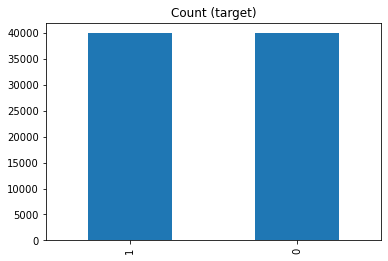

In [42]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.y.value_counts())

df_test_over.y.value_counts().plot(kind='bar', title='Count (target)');

C:\Users\oftog\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

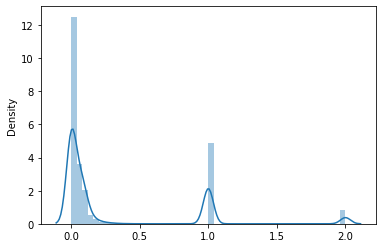

In [43]:
sns.distplot(df_test_over)

In [45]:
X_new=df_test_over[['balance', 'duration','housing', 'loan', 'contact']]
y_new=df_test_over['y']

In [47]:
y_new.value_counts()

1    39922
0    39922
Name: y, dtype: int64

In [48]:
# splitting the data after sampling
x_train_samp, x_test_samp, y_train_samp, y_test_samp = train_test_split(X_new,y_new,test_size = 0.2,random_state=0)

### Using random forest on sampled data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_samp = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_samp.fit(x_train_samp, y_train_samp)

acc_samp = rf_samp.score(x_test_samp,y_test_samp)*100
print(f"The accuracy of random forest score --> {acc_samp}")

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_score_samp=roc_auc_score(y_test_samp,rf_samp.predict(x_test_samp))
fpr,tpr,thresholds= roc_curve(y_test_samp,rf_samp.predict_proba (x_test_samp)[:,1])
y_pred_samp=rf_samp.predict(x_test_samp)
auc=roc_auc_score(y_test_samp,y_pred_samp)
plt.plot(fpr,tpr,color='red',label='logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
logit_roc_score_samp

### Using regularization methods -- Ridge 

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [53]:
ridge=Ridge()
parameters={'alpha':[5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train_samp,y_train_samp)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [5, 10, 20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [54]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-0.1726301260764252


In [56]:
prediction_ridge=ridge_regressor.predict(x_test_samp)

In [59]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test_samp, prediction_ridge))
print('MSE:', metrics.mean_squared_error(y_test_samp, prediction_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_samp, prediction_ridge)))

MAE: 0.367243619256434
MSE: 0.1727134972588967
RMSE: 0.41558813416518126


### Lasso 

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [62]:
lasso=Lasso()
parameters={'alpha':[5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x_train_samp,y_train_samp)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-0.25000609724993395


In [66]:
prediction_lasso=lasso_regressor.predict(x_test_samp)

In [67]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test_samp, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test_samp, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_samp, prediction_lasso)))

MAE: 0.5000308822413877
MSE: 0.25003474258199615
RMSE: 0.500034741375033


Thus, after applying different machine learning algorithms on the given dataset, Random forest is found to be more accurate     